<a href="https://colab.research.google.com/github/angelo-chu/python/blob/main/Monte_Carlo_Simulation_by_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

Set initial assumptions

In [16]:
mu = 0.1 #asset CAGR = 10%
Stds = [0.05, 0.1, 0.2, 0.4] #asset volatility
frequency = 12 #compounding frequency
years = 30 # compounding years
cnt = frequency * years

dt = 1/frequency

Define a function to simulate random walk of asset value

In [8]:
def Simulation_StockPrice(S0, mu, Std, dt):
    ## apply geometric brownian motion formula: https://en.wikipedia.org/wiki/Geometric_Brownian_motion#Solving_the_SDE
    S1 = S0 * np.exp((mu - 0.5 *Std**2)*dt + Std*np.sqrt(dt)*np.random.standard_normal())

    return S1

At each given asset volatility - simulate ending balance based on assumptions for N times, and plot in a histogram

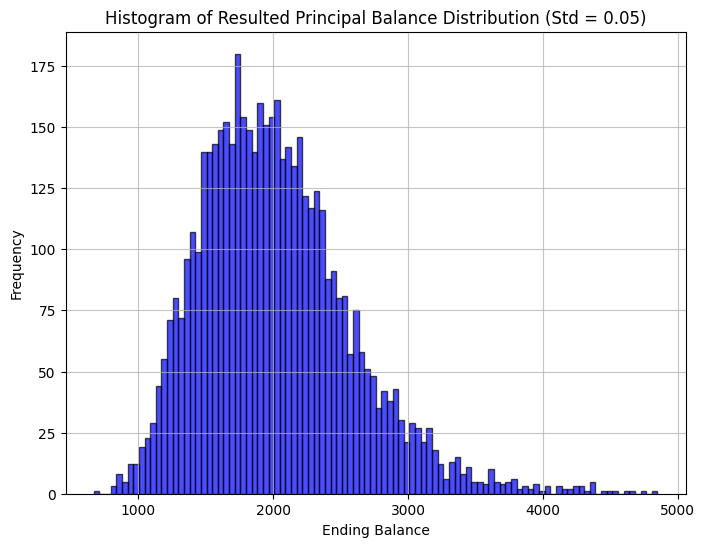

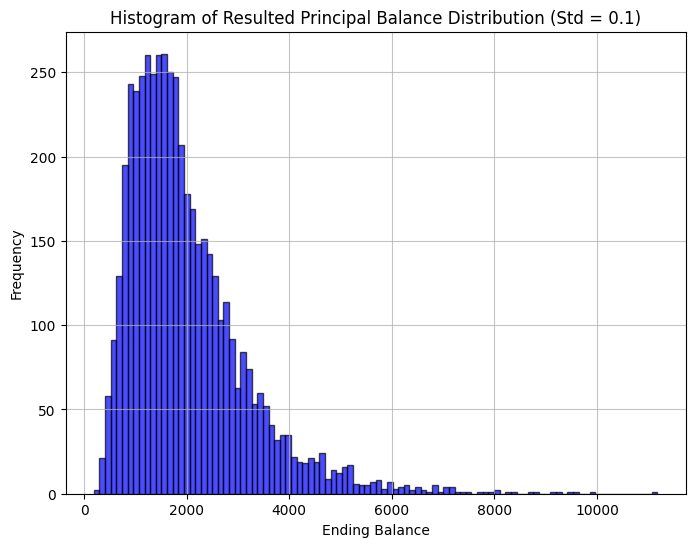

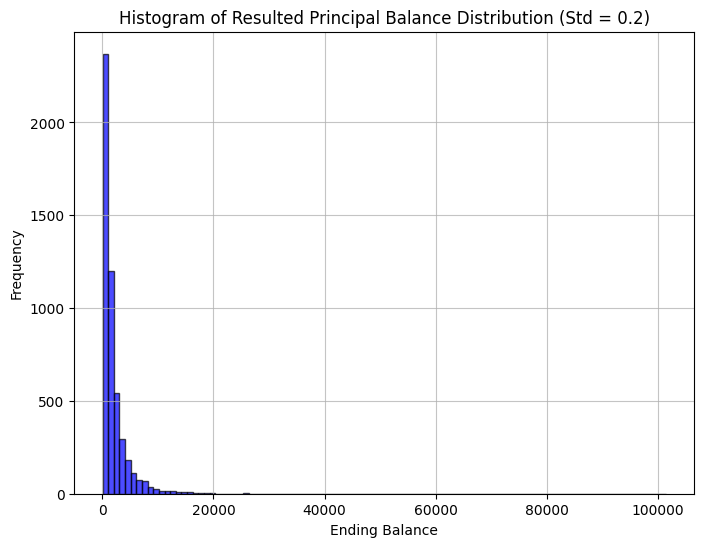

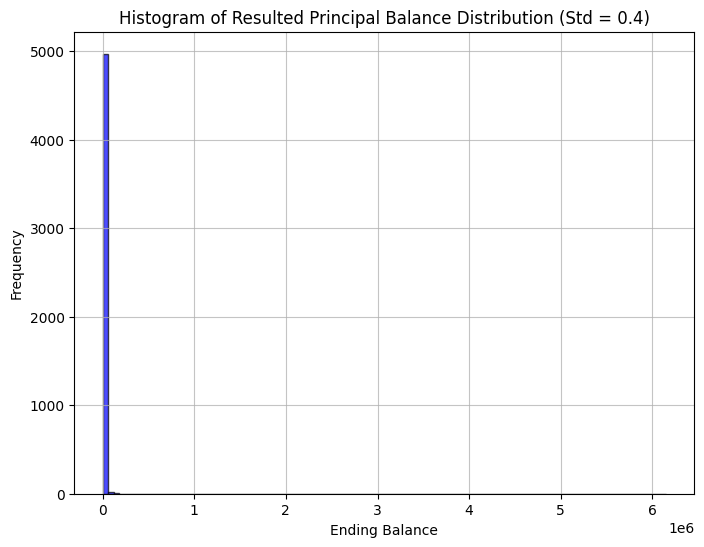

In [24]:
results = {}

for Std in Stds:

  res = []

  for j in range(0,5000): # execute simulations for 5000 times
      price = 100 # reset principal to 100
      for i in range(1,cnt+1):
          price = Simulation_StockPrice(price, mu, Std, dt);
      res.append(price)
  results[Std] = res

#--- plot histogram of resulted balance distribution---
import matplotlib.pyplot as plt
for Std, res in results.items():
    plt.figure(figsize=(8, 6))  # Create a new figure for each Std
    plt.hist(res, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of Resulted Principal Balance Distribution (Std = {Std})")
    plt.xlabel('Ending Balance')
    plt.ylabel('Frequency')
    plt.grid(axis='both', alpha=0.75)
    plt.show()